In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import control as ctrl
import matplotlib.pyplot as plt
import vibrationtesting as vt
import numpy as np
import scipy as sp

In [2]:
dir(vt.system)

['__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'c2d',
 'd2c',
 'damp',
 'la',
 'math',
 'np',
 'serep',
 'sig',
 'so2ss',
 'sos_frf',
 'sos_modal',
 'ssfrf',
 'warnings']

In [4]:
help(vt.sos_frf)

Help on function sos_frf in module vibrationtesting.system:

sos_frf(M, C, K, Bt, Cd, Cv, Ca, omega_low, omega_high, in_index, out_index)
    FRF of second order system
    
    Given second order linear matrix equation of the form
    :math:`M\ddot{x} + C \dot{x} + K x= \tilde{B} u`
    and
    :math:`y = C_d x + C_v \dot{x} + C_a\ddot{x}`
    converts to state space form and returns the requested frequency response
    function
    
    Parameters
    ----------
    M, C, K, Bt, Cd, Cv, Cd : float arrays
        Mass , damping, stiffness, input, displacement sensor, velocimeter,
        and accelerometer matrices
    
    Returns
    -------
    omega : float array
            frequency vector
    H : float array
        frequency response function
    
    Examples not working for second order system
    
    Need to make one for second order expansion
    
    Examples
    --------
    >>> import vibrationtesting as vt
    >>> A = np.array([[ 0.,   0. ,  1.    ,  0.    ],
    ...  

In [51]:
A = np.array([[0.,   0.,  1.,  0.],
              [0.,   0.,  0.,  1.],
              [-1.4,  1.2, -0.0058, 0.0014],
              [0.8, -1.4,  0.0016, -0.0038]])
B = np.array([[0., 0.],
              [0., 0.],
              [1., 0.],
              [0., 1.]])
C = np.array([[1,0,0,0],[0,1,0,0]])
D = np.array([[0],[0]])
omega, H = vt.ssfrf(A, B, C, D, 0, 3.5, 0, 0)
#vt.frfplot(omega, H)

ValueError: Input 0 or output 0 infeasible.

In [10]:
H.shape

(1, 1000)

In [29]:
H_all = np.zeros((2,1000,2), dtype = 'complex128')
for i in np.arange(2):
    for j in np.arange(2):
        omega, H_all[i,:,j] = vt.ssfrf(A, B, C, D, 0, 3.5, i, j)
    print(i)

0
1


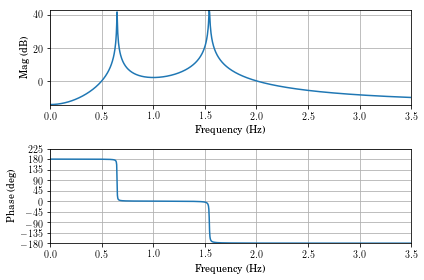

In [32]:
vt.frfplot(omega, H_all[0,:,1])

In [44]:
B.shape[1]

2

In [54]:
M = np.diag([1,1,1])

In [78]:
K = np.array([[3, -1, -1],[-1, 3, -1],[-1, -1, 3]])
K

array([[ 3, -1, -1],
       [-1,  3, -1],
       [-1, -1,  3]])

In [79]:
Damping = K*.01

In [80]:
Cd = np.eye(3)

In [81]:
Cv = Ca = np.zeros_like(Cd)

In [82]:
Bt = np.eye(3)
Bt

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [114]:
omega, H = vt.sos_frf(M, Damping, K, Bt, Cd, Cv, Ca, .0, 3, 1, 2)

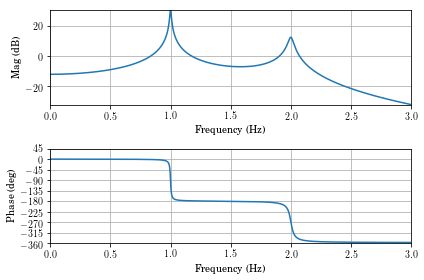

In [115]:
vt.frfplot(omega, H)

In [88]:
vt.sos_modal(M, K, Damping)

(array([ 1.,  2.,  2.]),
 array([ 0.005,  0.01 ,  0.01 ]),
 array([[ 0.57735027,  0.6172134 , -0.53452248],
        [ 0.57735027, -0.77151675, -0.26726124],
        [ 0.57735027,  0.15430335,  0.80178373]]))

In [89]:
help(vt.sos_frf)

Help on function sos_frf in module vibrationtesting.system:

sos_frf(M, C, K, Bt, Cd, Cv, Ca, omega_low, omega_high, in_index, out_index)
    FRF of second order system
    
    Given second order linear matrix equation of the form
    :math:`M\ddot{x} + C \dot{x} + K x= \tilde{B} u`
    and
    :math:`y = C_d x + C_v \dot{x} + C_a\ddot{x}`
    converts to state space form and returns the requested frequency response
    function
    
    Parameters
    ----------
    M, C, K, Bt, Cd, Cv, Cd : float arrays
        Mass, damping, stiffness, input, displacement sensor, velocimeter,
        and accelerometer matrices
    
    Returns
    -------
    omega : float array
            frequency vector
    H : float array
        frequency response function
    
    Examples not working for second order system
    
    Need to make one for second order expansion
    
    Examples
    --------
    >>> import vibrationtesting as vt
    >>> A = np.array([[ 0.,   0. ,  1.    ,  0.    ],
    ...   